In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

### VISUALITZACIÓ D'UN EXEMPLE DE LES DADES

<Figure size 640x480 with 0 Axes>

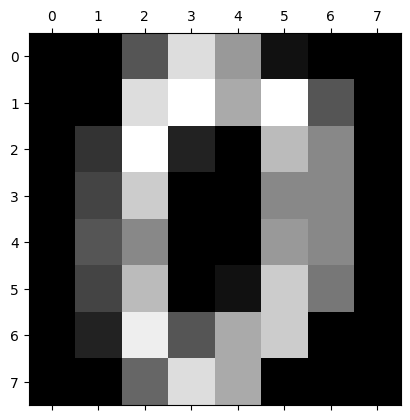

In [3]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

### DIVISIÓ ENTRE TRAIN I TEST

In [4]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PERCEPTRÓ

In [5]:
perceptron = linear_model.Perceptron(tol=1e-9, random_state=42)
perceptron.fit(X_train, y_train);
y_pred = perceptron.predict(X_test)

### RENDIMENT

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.78      1.00      0.88        28
           2       0.97      0.94      0.95        33
           3       1.00      0.94      0.97        34
           4       1.00      0.98      0.99        46
           5       0.98      0.89      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9       0.93      0.93      0.93        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### MATRIU DE CONFUSIÓ

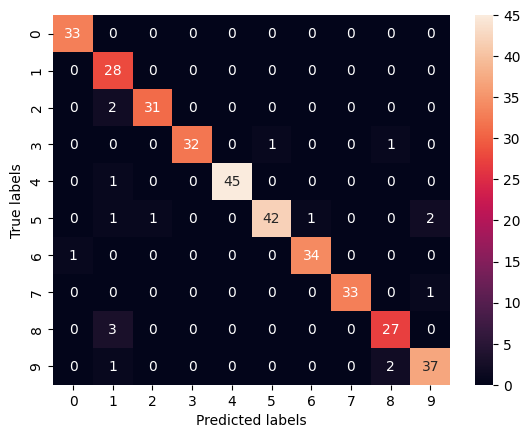

In [7]:
'''cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()
plt.show()'''

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# REGRESSOR LOGÍSTIC

In [8]:
logistic_regression = linear_model.LogisticRegression(max_iter=1581)
logistic_regression.fit(X_train, y_train)
y_pred=logistic_regression.predict(X_test)

### RENDIMENT

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### MATRIU DE CONFUSIÓ

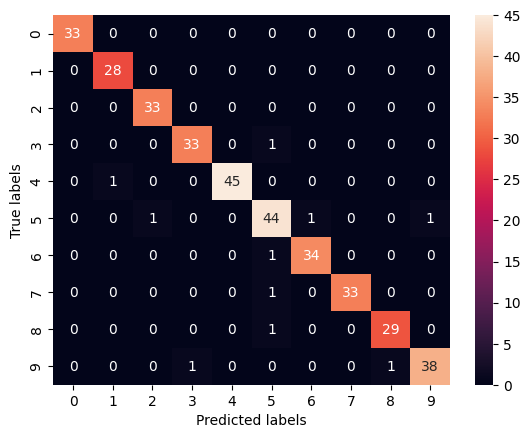

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()